In [ ]:
'''
Neural Networks

Área de estudo que tem por objetivo criar uma Rede Neural Artificial similar
a funcionalidade dos neurônios no cérebro humano.

Neurônios ativados são aqueles que enviam informações a outros neurônios
e desativados são os que recebem informações. Dessa conexão se forma
reconhecimento de padrões.

Por exemplo: Rede Neural capaz de reconhecer um dígito numérico escrito de diferentes formas.

'''

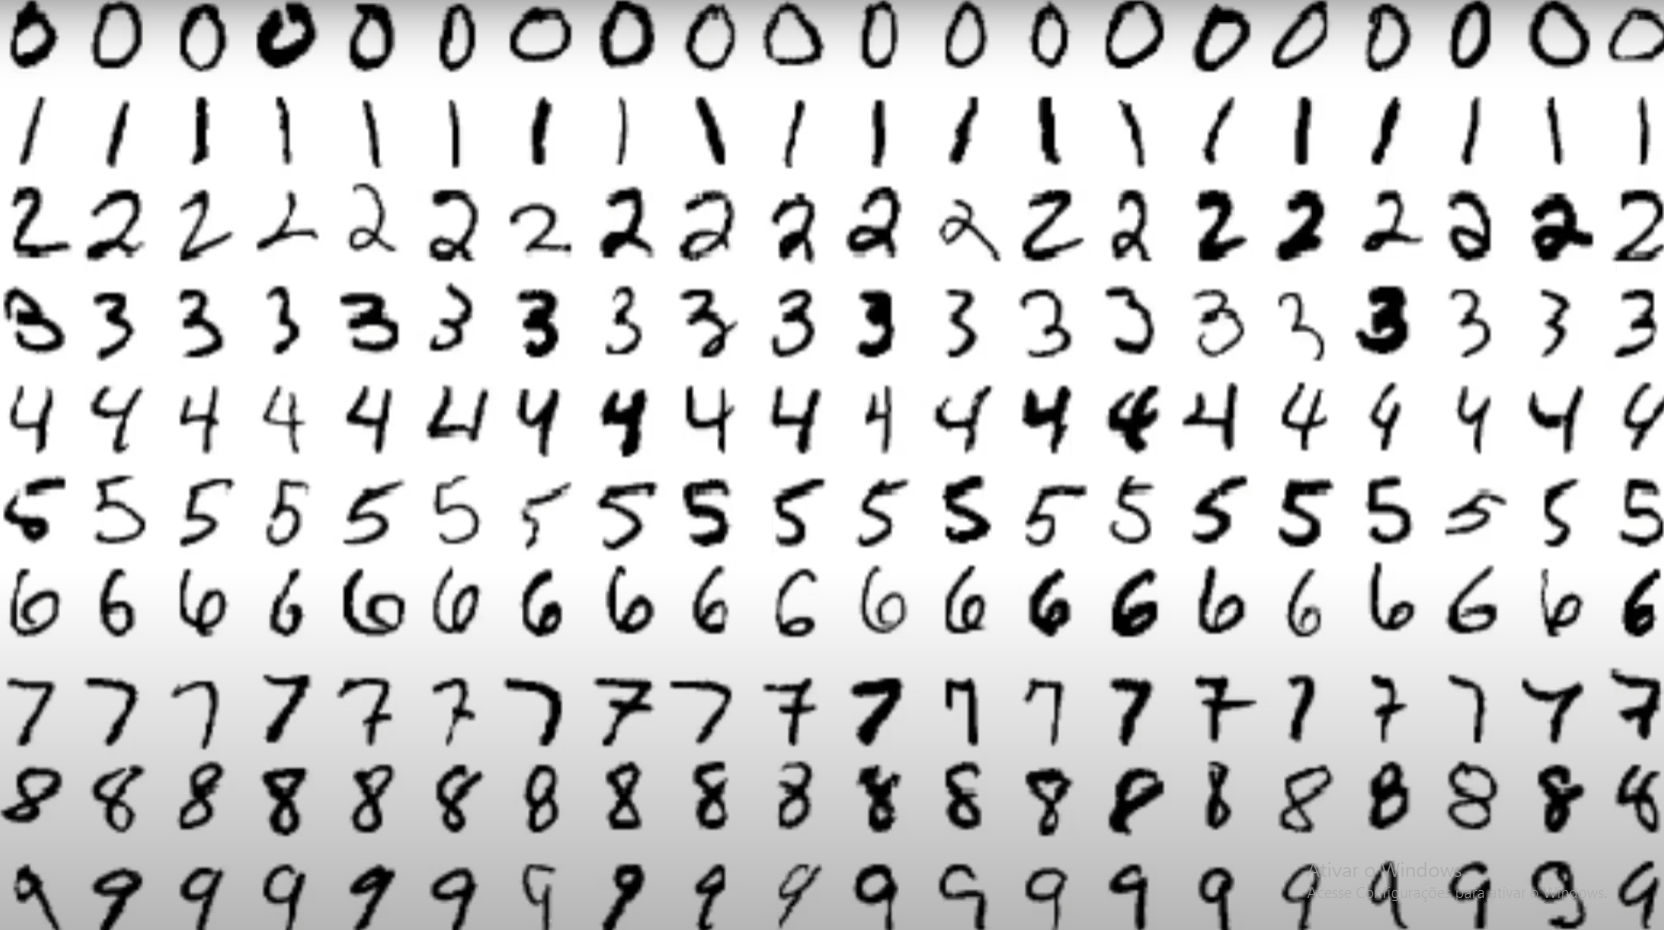

In [ ]:
'''
Sem as Redes Neurais, o algoritmo apenas iria gravar os valores pré-existentes,
não seria capaz dado um número x saber qual é.

A Rede Neural é capaz de encontrar padrões dado um conjunto e compreender a diferença entre eles,
sempre que for introduzido um novo número ser capaz de identificar.

Para este exemplo, uma imagem será utilizada com 784 pixels / os neurônios de entrada. 
Cada pixel contém uma informação númerica de 0 a 1, sendo 0 preto e 1 branco. Os números
de 0 a 9 / neurônios de saída também contém um valor de 0 a 1, e quanto maior este valor
mais provável de ser o número associado a ele. Além disso, existe uma camada intermediária
separando os neurônios de entrada e os de saída, responsável por aplicar os pesos e ativações.

Uma Rede Neural Simples portanto, possui três camadas, Entrada, Intermediária (ou Oculta) e
uma de Saída.

Dado uma imagem com 784 pixels representando um número x: A Rede Neural conectará cada
pixel da imagem com cada número. O neurônio de saída que contiver o maior valor embutido
será aquele previsto pela Rede Neural.

Para este processo, uma fórmula matemática é disposta:
Nx = E1W1x + E2Wx + EnWnx + b
Sendo N o resultado do número x.
x o número a ser calculado (0 a 9).
E1, E2, En os valores de entrada (cada pixel até 784).
W1, W2, Wn o peso
b constante viés
Engloba a conta e aplica a função Sigmóide (normaliza a entrada para um valor entre 0 e 1).
Quanto maior o N, mais próximo de 1.
O que determina o valor previsto pela Rede Neural.


Por exemplo:
Dada uma imagem com o número x:

Neurônio 0 : 0.67
Neurônio 1 : 0.55
Neurônio 2 : 0.34
Neurônio 3 : 0.22
Neurônio 4 : 0.86
Neurônio 5 : 0.95
Neurônio 6 : 0.11
Neurônio 7 : 0.09
Neurônio 8 : 0.04
Neurônio 9 : 0.18

É mais provável que esta imagem contenha o número 5.


Os pesos e o viés são definidos a partir do primeiro dígito, 0. Quando
estes forem altos, definiremos para o valor 0. Dessa forma, exstirá um padrão
em que 0 contém pesos altos, enquanto os outros menores. Assim, o modelo não erra ao
predizer que número está na imagem.

Pesos negativos servem para fazer separação entre dígitos muito parecidos como 4 e 9,
1 e 7, 0 e 8, dependendo da forma que está escrito. Para estes, a parte que os diferencia
terá valores drásticamente opostos como, por exemplo: -0.3 e 0.97.

Na Fase de Treinamento, a Rede Neural possui o gabarito de cada número. 


Como calibrar?

Supondo que a Rede Neural ainda esteja "burrinha".
Dado número: 2
  Valores previstos   |   Valores ideais
0        0.32                   0
1        0.51                   0
2        0.45-> Valor Correto   1
3        0.21                   0
4        0.67                   0
5        0.13                   0
6        0.04                   0
7        0.89-> Valor Previsto  0
8        0.83                   0 
9        0.28                   0


Neste caso, a Rede Neural apenas chutou valores para os pesos e previu com base neles.
Para sanar este problema, um função de custo é criada, somando todo o erro que a Rede
teve, isto é, para cada valor previsto menos o valor ideal, a distância da realidade
com a expectativa. A função de custo, portanto conterá a soma de todos os erros² para
que seja sempre positivo.

Custo = (0.32 - 0)² + (0.51 - 0)² + (0.45 - 1)² + (0.21 - 0)² + (0.67 - 0)² + (0.13 - 0)² + (0.04 - 0)² + (0.89 - 0)² + (0.83 - 0)² + (0.28 - 0)²
Custo = 2.7359. Quanto mais próximo de 0, mais próximo de estar calibrada.

Para ajustar, primeiramente, o foco precisar ser no número em que estamos tentando fazer com que
a Rede consiga acertar: 2. O ajuste começa nos pesos primeiro, aumentando ou diminuindo, para que 0.45 esteja mais
próximo de 1 e que o valor de Custo esteja mais próximo de 0. Porém, existe o erro da Rede Neural ficar "viciada",
ser capaz de reconhecer aquela imagem específica e não aprender de fato seu conteúdo e predizer. Ela decorou e não
aprendeu. O caso ideal, portanto é treiná-la com todos os resultados e pesos, somar todos os custos e aí então 
ajustar os pesos. Dessa forma, estaremos calibrando todos de uma vez. A Rede Neural não estará mais sendo viciada
para uma imagem específica e sim de fato aprendendo o quadro geral de cada número. Vale lembrar que muito difícil
o custo será 0 definitivo. O mais provável que aconteça é que chegará um momento, em algum valor dos pesos que ao alterá-lo
aumentará o valor do custo total, não terá mais como diminuí-lo.



Em Deep Learning
Possuímos VÁRIAS camadas intermediárias. Essas camadas intermediárias são responsáveis por tarefas menores, mas lidando com maior precisão, por exemplo
em uma Rede Neural possuímos três camadas intermediárias. A primeira delas analisa uma pequena fração do pixel e ajusta os pesos de acordo, a segunda
é capaz de reunir todas as análises feitas pela Camada 1 e esboçar uma figura, enquanto a terceira termina o processo e envia para a saída que mostra
o número previsto.
Seria o análogo a comparar a eficiência de uma única pessoa construindo uma casa versus uma equipe de pedreiros.

'''

![image.png](attachment:image.png)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load no Dataset
data = keras.datasets.fashion_mnist

# Separar em treino e teste
(train_images, train_labels), (test_images, test_labels) = data.load_data()

# Nome das labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Os valores atuais variam entre 0 e 255. Mudança para que eles variem entre 0 e 1.
train_images = train_images / 255
test_images = test_images / 255

# Para este exemplo, é necessário usar flatten. Técnica que consiste em pegar
# o conjunto de dados [[1], [2], [3]] e colocá-lo em um formato [1, 2, 3]
# Para que os neurônios de entrada estejam em um formato uniforme
# Isso é extremamente recomendado.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Flatten Entrada;
    keras.layers.Dense(128, activation='relu'), # Camada intermediária + Ativação ReLU;
    keras.layers.Dense(10, activation='softmax') # Saída + Ativação Softmax(Probabilidade).
])

# Optimizer : Otimizador Adam padrão;
# Loss : Erro - imprecisão da Rede Neural;
# Metrics : Acurácia - o que será mostrado.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Epochs : Quantas vezes o modelo verá a informação.
# Neste caso, quantas vezes o modelo verá a mesma imagem.
model.fit(train_images, train_labels, epochs=10)

# Acurácia do modelo
test_loss, test_score = model.evaluate(test_images, test_labels)

print(f'Acurácia: {round(test_score * 100)}\nPerda: {round(test_loss * 100)}')

In [ ]:
pred = model.predict(test_images)

# Mostrando as imagens com o título sendo o valor previsto e o eixo X sendo o valor real
for i in range(40):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Valor real: {labels[test_labels[i]]}')
    plt.title(f'Valor previsto: {labels[np.argmax(pred[i])]}')
    plt.show()